In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# 1) Загрузка
pima = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')


In [ ]:
for df, name in [(pima,'Pima'), (wine,'Wine')]:
    print(f'=== {name} ===')
    display(df.head(), df.info(), df.describe())


=== Pima ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


=== Wine ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Pima: пропусков нет, все числовые
# Wine: тоже в этом датасете нет пропусков

# В Wine качество (quality) переведём в категориальную: low(<=5), medium(6), high(>=7)
wine['quality_label'] = pd.cut(wine.quality, bins=[0,5,6,10], labels=['low','med','high'])
wine.drop('quality', axis=1, inplace=True)

In [ ]:
# Кодируем метки
le = LabelEncoder()
pima['Outcome'] = le.fit_transform(pima.Outcome)
wine['quality_label'] = le.fit_transform(wine.quality_label)

# X, y
y1 = pima['Outcome']
X1 = pima.drop('Outcome', axis=1)
y2 = wine['quality_label']
X2 = wine.drop('quality_label', axis=1)

In [ ]:
def prepare(X, y, test_size=0.3, random_state=42):
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    scaler = StandardScaler().fit(Xtr)
    return scaler.transform(Xtr), scaler.transform(Xte), ytr, yte

X1_tr, X1_te, y1_tr, y1_te = prepare(X1, y1)
X2_tr, X2_te, y2_tr, y2_te = prepare(X2, y2)

In [ ]:
models = {
    'LogReg': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'RandomForest': RandomForestClassifier(),
    'GBM': GradientBoostingClassifier(),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

def train_eval(models, Xtr, Xte, ytr, yte):
    reports = {}
    for name, mdl in models.items():
        mdl.fit(Xtr, ytr)
        ypred = mdl.predict(Xte)
        acc = accuracy_score(yte, ypred)
        cr = classification_report(yte, ypred, output_dict=True)
        reports[name] = {'accuracy': acc, 'report': cr}
        print(f'==={name}===\n', classification_report(yte, ypred))
    return reports

print("----- Pima -----")
rep1 = train_eval(models, X1_tr, X1_te, y1_tr, y1_te)
print("----- Wine -----")
rep2 = train_eval(models, X2_tr, X2_te, y2_tr, y2_te)

----- Pima -----
===LogReg===
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231

===SVM===
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.54      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231

===RandomForest===
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg

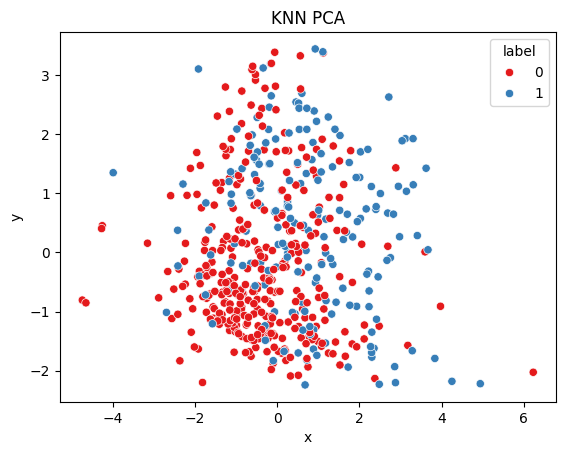

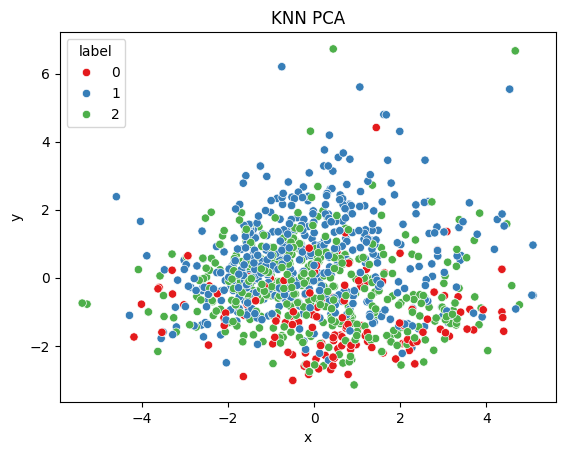

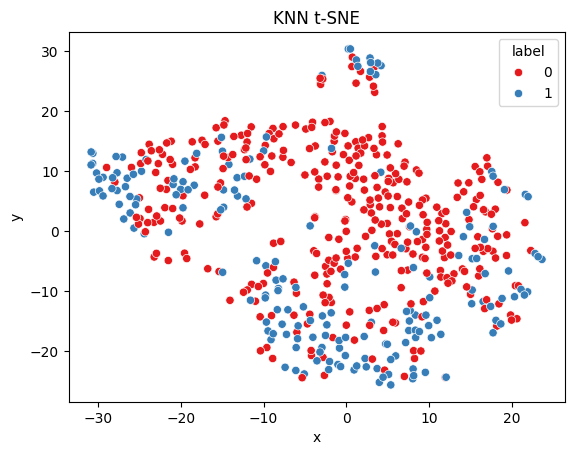

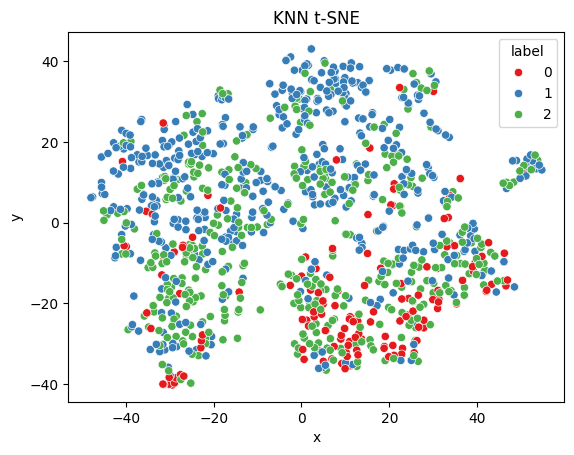

In [ ]:
def plot_2d(X, y, title):
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    sns.scatterplot(x='x',y='y', hue='label', data=df, palette='Set1')
    plt.title(title); plt.show()

# PCA
Xp1_tr = PCA(n_components=2).fit_transform(X1_tr)
Xp1_te = PCA(n_components=2).fit_transform(X1_te)
plot_2d(Xp1_tr, y1_tr, f'{name} PCA')
Xp2_tr = PCA(n_components=2).fit_transform(X2_tr)
Xp2_te = PCA(n_components=2).fit_transform(X2_te)
plot_2d(Xp2_tr, y2_tr, f'{name} PCA')
# t-SNE
Xt1_tr = TSNE(n_components=2, random_state=42).fit_transform(X1_tr)
Xt1_te = TSNE(n_components=2, random_state=42).fit_transform(X1_te)
plot_2d(Xt1_tr, y1_tr, f'{name} t-SNE')
Xt2_tr = TSNE(n_components=2, random_state=42).fit_transform(X2_tr)
Xt2_te = TSNE(n_components=2, random_state=42).fit_transform(X2_te)
plot_2d(Xt2_tr, y2_tr, f'{name} t-SNE')


In [ ]:
print("----- Pima PCA -----")
rep3 = train_eval(models, Xp1_tr, Xp1_te, y1_tr, y1_te)
print("----- Pima TSNE -----")
rep3 = train_eval(models, Xt1_tr, Xt1_te, y1_tr, y1_te)
print("----- Wine PCA -----")
rep4 = train_eval(models, Xp2_tr, Xp2_te, y2_tr, y2_te)
print("----- Wine TSNE -----")
rep5 = train_eval(models, Xt2_tr, Xt2_te, y2_tr, y2_te)

----- Pima PCA -----
===LogReg===
               precision    recall  f1-score   support

           0       0.75      0.85      0.80       150
           1       0.64      0.48      0.55        81

    accuracy                           0.72       231
   macro avg       0.70      0.67      0.67       231
weighted avg       0.71      0.72      0.71       231

===SVM===
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.48      0.56        81

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231

===RandomForest===
               precision    recall  f1-score   support

           0       0.71      0.79      0.74       150
           1       0.50      0.40      0.44        81

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.59       231
weighted

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

===RandomForest===
               precision    recall  f1-score   support

           0       0.64      0.91      0.75       150
           1       0.26      0.06      0.10        81

    accuracy                           0.61       231
   macro avg       0.45      0.48      0.43       231
weighted avg       0.51      0.61      0.52       231

===GBM===
               precision    recall  f1-score   support

           0       0.64      0.95      0.76       150
           1       0.11      0.01      0.02        81

    accuracy                           0.62       231
   macro avg       0.38      0.48      0.39       231
weighted avg       0.45      0.62      0.50       231



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

===NaiveBayes===
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231

===KNN===
               precision    recall  f1-score   support

           0       0.65      0.89      0.75       150
           1       0.38      0.12      0.19        81

    accuracy                           0.62       231
   macro avg       0.52      0.51      0.47       231
weighted avg       0.56      0.62      0.56       231

----- Wine PCA -----
===LogReg===
               precision    recall  f1-score   support

           0       0.50      0.22      0.30        65
           1       0.63      0.77      0.69       223
           2       0.51      0.48      0.49       192

    accuracy                           0.58       480
   macro a

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
from tqdm import tqdm

def bootstrap_eval(model, X, y, n_iters=100):
    scores = []
    n = len(y)
    for i in tqdm(range(n_iters), desc=f"Model {model}"):
        Xs, ys = resample(X, y)
        model.fit(Xs, ys)
        scores.append(model.score(X, y))
    return np.mean(scores), np.std(scores)

boot_res = {}
for ds, (Xtr, ytr) in zip(['Pima','Wine'], [(X1_tr,y1_tr),(X2_tr,y2_tr)]):
    print(f"Dataset {ds}")
    boot_res[ds] = {}
    for name, mdl in models.items():
        m, s = bootstrap_eval(mdl, Xtr, ytr, n_iters=250)
        boot_res[ds][name] = (m, s)
print(boot_res)


Dataset Pima


Model KNeighborsClassifier(): 100%|██████████| 250/250 [00:10<00:00, 22.81it/s]


Dataset Wine


Model KNeighborsClassifier(): 100%|██████████| 250/250 [00:25<00:00,  9.79it/s]

{'Pima': {'LogReg': (np.float64(0.7847225325884544), np.float64(0.008230656315266994)), 'SVM': (np.float64(0.8173333333333334), np.float64(0.008594305464898913)), 'RandomForest': (np.float64(0.9088864059590317), np.float64(0.009838821898403178)), 'GBM': (np.float64(0.8829497206703911), np.float64(0.010500426321762818)), 'NaiveBayes': (np.float64(0.7618919925512103), np.float64(0.010181555347789355)), 'KNN': (np.float64(0.7830763500931098), np.float64(0.012865325434080822))}, 'Wine': {'LogReg': (np.float64(0.6423592493297587), np.float64(0.007291261391738064)), 'SVM': (np.float64(0.7059374441465595), np.float64(0.0076050445828849365)), 'RandomForest': (np.float64(0.8819624664879356), np.float64(0.008578573860049723)), 'GBM': (np.float64(0.8233100983020554), np.float64(0.008881481083415136)), 'NaiveBayes': (np.float64(0.5965397676496873), np.float64(0.014758063538295419)), 'KNN': (np.float64(0.6819016979445934), np.float64(0.011174823041680867))}}


In [ ]:
boot_res

{'Pima': {'LogReg': (np.float64(0.7847225325884544),
   np.float64(0.008230656315266994)),
  'SVM': (np.float64(0.8173333333333334), np.float64(0.008594305464898913)),
  'RandomForest': (np.float64(0.9088864059590317),
   np.float64(0.009838821898403178)),
  'GBM': (np.float64(0.8829497206703911), np.float64(0.010500426321762818)),
  'NaiveBayes': (np.float64(0.7618919925512103),
   np.float64(0.010181555347789355)),
  'KNN': (np.float64(0.7830763500931098), np.float64(0.012865325434080822))},
 'Wine': {'LogReg': (np.float64(0.6423592493297587),
   np.float64(0.007291261391738064)),
  'SVM': (np.float64(0.7059374441465595), np.float64(0.0076050445828849365)),
  'RandomForest': (np.float64(0.8819624664879356),
   np.float64(0.008578573860049723)),
  'GBM': (np.float64(0.8233100983020554), np.float64(0.008881481083415136)),
  'NaiveBayes': (np.float64(0.5965397676496873),
   np.float64(0.014758063538295419)),
  'KNN': (np.float64(0.6819016979445934), np.float64(0.011174823041680867))}}

In [ ]:
param_dist = {
    'C': np.logspace(-3,3,10),
    'gamma': ['scale','auto'] + list(np.logspace(-4,1,10)),
    'kernel': ['rbf','poly','sigmoid']
}
rand_svm = RandomizedSearchCV(SVC(), param_distributions=param_dist,
                              n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rand_svm.fit(X1_tr, y1_tr)
print("Best SVM params (Pima):", rand_svm.best_params_, "score:", rand_svm.best_score_)


Best SVM params (Pima): {'kernel': 'rbf', 'gamma': np.float64(0.001291549665014884), 'C': np.float64(215.44346900318823)} score: 0.7839217722395293


In [ ]:
# Соберём final accuracy, boot mean±std, best_params
summary = []
for ds, rep, boot in [('Pima',rep1,boot_res['Pima']),('Wine',rep2,boot_res['Wine'])]:
    for mdl in models:
        summary.append({
            'dataset': ds,
            'model': mdl,
            'acc_test': rep[mdl]['accuracy'],
            'boot_mean': boot[mdl][0],
            'boot_std': boot[mdl][1],
        })
summary_df = pd.DataFrame(summary)
display(summary_df)


,dataset,model,acc_test,boot_mean,boot_std
0,Pima,LogReg,0.744589,0.784723,0.008231
1,Pima,SVM,0.753247,0.817333,0.008594
2,Pima,RandomForest,0.748918,0.908886,0.009839
3,Pima,GBM,0.757576,0.882950,0.010500
4,Pima,NaiveBayes,0.744589,0.761892,0.010182
5,Pima,KNN,0.714286,0.783076,0.012865
6,Wine,LogReg,0.618750,0.642359,0.007291
7,Wine,SVM,0.654167,0.705937,0.007605
8,Wine,RandomForest,0.704167,0.881962,0.008579
9,Wine,GBM,0.656250,0.823310,0.008881


**Вывод**
- Самые высокие acc_test на Pima показал градиентный бустинг с F1=0.76
- На Wine лучшим оказался RandomForest с F1=0.7
- От добавления PCA и TSNE результаты моделей на Pima и на Wine не улучшились
- RandomizedSearchCV для SVM на Pima подобрал kernel=rbf, C=215.4, gamma=0.001